In [3]:
from google.colab import files
file_uploaded = files.upload()

Saving 최종.csv to 최종.csv


In [25]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt 


In [6]:
# 데이터 불러오기

bstSeller = pd.read_csv("./최종.csv")

bstSeller.head()

,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
0,트렌드 코리아 2020,김난도,미래의창,20191024,경제/경영,18000,448,12
1,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,위즈덤하우스,20191030,인문,16000,392,12
2,지쳤거나 좋아하는 게 없거나,글배우,강한별,20190904,시/에세이,13500,248,12
3,팩트풀니스(양장본 HardCover),한스 로슬링,김영사,20190310,인문,19800,474,12
4,에이트(양장본 HardCover),이지성,차이정원,20191021,자기계발,17000,308,12


In [7]:
# 중복 제거
# bstSeller = bstSeller.drop_duplicates(["도서명"],keep = "first")

In [9]:
bstSeller.info() # 2400-rows, 8-cols

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   도서명     2400 non-null   object
 1   저자명     2400 non-null   object
 2   출판사명    2400 non-null   object
 3   출간일     2400 non-null   int64 
 4   분야      2400 non-null   object
 5   정가      2400 non-null   int64 
 6   쪽수      2400 non-null   int64 
 7   월       2400 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 150.1+ KB


In [12]:
# 제일 비싼 도서와 제일 저렴한 도서
bk_cost=bstSeller.groupby('도서명')['정가'].mean() 
bk_cost.sort_values(ascending=False)

도서명
금융 위기 템플릿(레이 달리오의)(전3권)                 43000
이윤기의 그리스 로마 신화(특별합본판)(양장본 HardCover)    39800
유러피언                                    38000
자본과 이데올로기(양장본 HardCover)                38000
서양미술사                                   38000
                                        ...  
열혈강호. 81                                 4500
소설 보다: 가을 2020                           3500
소설 보다: 봄 2020                            3500
소설 보다: 여름 2020                           3500
부동산과 세금(2020)                            2000
Name: 정가, Length: 889, dtype: int64

In [14]:
# 분야 : 범주형 -> 이진수
field_1 = pd.get_dummies(bstSeller['분야'])

# '분야' category 삭제
bstSeller = bstSeller.drop('분야', axis = 1)
field_1


,가정/육아,건강,경제/경영,과학,기술/공학,만화,소설,시/에세이,어린이(초등),여행,역사/문화,예술/대중문화,외국어,요리,유아(0~7세),인문,자기계발,정치/사회,종교,취미/실용/스포츠,컴퓨터/IT
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2396,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2397,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2398,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# 새로 만든 분야 합체
bstSeller = bstSeller.join(field_1)
bstSeller

,도서명,저자명,출판사명,출간일,정가,쪽수,월,가정/육아,건강,경제/경영,과학,기술/공학,만화,소설,시/에세이,어린이(초등),여행,역사/문화,예술/대중문화,외국어,요리,유아(0~7세),인문,자기계발,정치/사회,종교,취미/실용/스포츠,컴퓨터/IT
0,트렌드 코리아 2020,김난도,미래의창,20191024,18000,448,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,위즈덤하우스,20191030,16000,392,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,지쳤거나 좋아하는 게 없거나,글배우,강한별,20190904,13500,248,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,팩트풀니스(양장본 HardCover),한스 로슬링,김영사,20190310,19800,474,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,에이트(양장본 HardCover),이지성,차이정원,20191021,17000,308,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,해커스 토익 700+ LC+RC(한 권으로 끝내는),해커스 어학연구소,해커스어학연구소,20200417,19500,596,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2396,인간 실격(세계문학전집 103),다자이 오사무,민음사,20120410,8000,192,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2397,주식 네 이놈. 2: 기법편,문제룡,지서연,20201121,20000,292,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2398,어린이 명심보감(읽으면서 바로 써먹는)(맛있는 공부 33),한날,파란정원,20200915,12000,224,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
# 출판사 : 범주형 -> 이진수
publisher_1 = pd.get_dummies(bstSeller['출판사명'])

# '출판사' category 삭제
bstSeller = bstSeller.drop('출판사명', axis = 1)

# 새로 만든 출판사 합체
bstSeller = bstSeller.join(publisher_1)
bstSeller

,도서명,저자명,출간일,정가,쪽수,월,가정/육아,건강,경제/경영,과학,기술/공학,만화,소설,시/에세이,어린이(초등),여행,역사/문화,예술/대중문화,외국어,요리,유아(0~7세),인문,자기계발,정치/사회,종교,취미/실용/스포츠,컴퓨터/IT,&(앤드),21세기북스,Big Hit IP,EBS BOOKS,PLI,YBM,가나출판사,가디언,갈라파고스,강한별,갤리온,걷는사람,겜툰,...,포르체,폴리티쿠스,푸른숲,플레인,피어오름,피카(FIKA),필름(Feelm),핏북,하빌리스,하이비전,학산문화사,한겨레출판사,한국경제신문,한국경제신문i,한글샘,한길사,한빛라이프,한빛미디어,한빛비즈,한솔수북,해냄출판사,해커스,해커스어학연구소,허들링북스,허밍버드,허블,현대문학,현대지성,혜다,호우야,홍익출판사,황소북스,후마니타스,휘선,휴머니스트,휴먼큐브,흐름출판,흔,힘찬북,힘찬북스
0,트렌드 코리아 2020,김난도,20191024,18000,448,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,20191030,16000,392,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,지쳤거나 좋아하는 게 없거나,글배우,20190904,13500,248,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,팩트풀니스(양장본 HardCover),한스 로슬링,20190310,19800,474,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,에이트(양장본 HardCover),이지성,20191021,17000,308,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,해커스 토익 700+ LC+RC(한 권으로 끝내는),해커스 어학연구소,20200417,19500,596,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2396,인간 실격(세계문학전집 103),다자이 오사무,20120410,8000,192,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2397,주식 네 이놈. 2: 기법편,문제룡,20201121,20000,292,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2398,어린이 명심보감(읽으면서 바로 써먹는)(맛있는 공부 33),한날,20200915,12000,224,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:
# bias를 위한 상수항 추가

bstSeller = sm.add_constant(bstSeller, has_constant = "add")
bstSeller

,const,도서명,저자명,출간일,정가,쪽수,월,가정/육아,건강,경제/경영,과학,기술/공학,만화,소설,시/에세이,어린이(초등),여행,역사/문화,예술/대중문화,외국어,요리,유아(0~7세),인문,자기계발,정치/사회,종교,취미/실용/스포츠,컴퓨터/IT,&(앤드),21세기북스,Big Hit IP,EBS BOOKS,PLI,YBM,가나출판사,가디언,갈라파고스,강한별,갤리온,걷는사람,...,포르체,폴리티쿠스,푸른숲,플레인,피어오름,피카(FIKA),필름(Feelm),핏북,하빌리스,하이비전,학산문화사,한겨레출판사,한국경제신문,한국경제신문i,한글샘,한길사,한빛라이프,한빛미디어,한빛비즈,한솔수북,해냄출판사,해커스,해커스어학연구소,허들링북스,허밍버드,허블,현대문학,현대지성,혜다,호우야,홍익출판사,황소북스,후마니타스,휘선,휴머니스트,휴먼큐브,흐름출판,흔,힘찬북,힘찬북스
0,1.0,트렌드 코리아 2020,김난도,20191024,18000,448,12,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,20191030,16000,392,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,지쳤거나 좋아하는 게 없거나,글배우,20190904,13500,248,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,팩트풀니스(양장본 HardCover),한스 로슬링,20190310,19800,474,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,에이트(양장본 HardCover),이지성,20191021,17000,308,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,1.0,해커스 토익 700+ LC+RC(한 권으로 끝내는),해커스 어학연구소,20200417,19500,596,11,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2396,1.0,인간 실격(세계문학전집 103),다자이 오사무,20120410,8000,192,11,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2397,1.0,주식 네 이놈. 2: 기법편,문제룡,20201121,20000,292,11,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2398,1.0,어린이 명심보감(읽으면서 바로 써먹는)(맛있는 공부 33),한날,20200915,12000,224,11,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **가장 다수 분포된 가격**

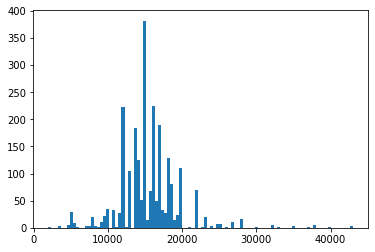

In [24]:
plt.hist(bstSeller['정가'],bins=100)
plt.show()

## **가격과 쪽수의 상관관계 - 쪽수가 증가할수록 가격도 증가하는가?
즉, 쪽수(독립변수)가 정가(종속변수)에 미치는 영향**

In [30]:
# 단순회귀분석
model = smf.ols(formula = '정가 ~ 쪽수', data = bstSeller)
result = model.fit()
result.summary() # 결과해석 순서 : 결정계수 확인 -> 모형의 적합도 확인 -> 회귀계수 확인 -> t값과 t값의 유의확률

# r-squared 값이 0.445로 설명력이 44.5% 설명력이 조금 낮다.
# F값이 1922, 유의확률은 0.000으로 통계적으로 유의미함.
# 결과 중 Intercept(절편)의 t값은 61.022, P>|t|값은 0.000으로 이 회귀모형의 절편값은 유의한 것으로 나타났으며 그 값은 9383.6391으로 나타났다.
# 쪽수의 t값은 43.843, P>|t|값은 0.000으로 쪽수도 유의하여 쪽수의 계수는 18.4055으로 도출됐다. 

# 즉, 1쪽이 증가할수록 정가가 18.4055원 증가한다는 뜻이다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     정가   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     1922.
Date:                Sun, 07 Feb 2021   Prob (F-statistic):          7.27e-309
Time:                        14:00:52   Log-Likelihood:                -22648.
No. Observations:                2400   AIC:                         4.530e+04
Df Residuals:                    2398   BIC:                         4.531e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9383.6391    153.774     61.022      0.000    9082.095    9685.183
쪽수            18.4055      0.420     43.843      0.000      17.582      19.229
==============================================================================
Omnibus:                      523.245   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6588.943
Skew:                           0.661   Prob(JB):                         0.00
Kurtosis:                      11.009   Cond. No.                         909.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **분야와 월의 상관관계
과연 계절마다 선호하는 분야가 다를까?
12 1 2, 3 4 5, 6 7 8, 9 10 11 로 나누어서 분야별 개수를 판단.**

In [99]:
# 데이터 불러오기

bstSeller = pd.read_csv("./최종.csv")

bstSeller.head()

,도서명,저자명,출판사명,출간일,분야,정가,쪽수,월
0,트렌드 코리아 2020,김난도,미래의창,20191024,경제/경영,18000,448,12
1,"1일 1페이지, 세상에서 가장 짧은 교양 수업 365",데이비드 S. 키더,위즈덤하우스,20191030,인문,16000,392,12
2,지쳤거나 좋아하는 게 없거나,글배우,강한별,20190904,시/에세이,13500,248,12
3,팩트풀니스(양장본 HardCover),한스 로슬링,김영사,20190310,인문,19800,474,12
4,에이트(양장본 HardCover),이지성,차이정원,20191021,자기계발,17000,308,12


In [100]:
is_month_spr = bstSeller['월'] == 12
month_spr = bstSeller[is_month_spr]
month_spr['분야'].value_counts()

소설          30
경제/경영       29
시/에세이       29
인문          28
어린이(초등)     22
자기계발        18
역사/문화        9
외국어          8
유아(0~7세)     5
과학           4
가정/육아        4
만화           3
건강           3
예술/대중문화      2
요리           2
정치/사회        2
종교           1
컴퓨터/IT       1
Name: 분야, dtype: int64

In [111]:
is_month_wt1 = bstSeller['월'] == 3
print(is_month_wt1)
is_month_wt2 = bstSeller['월'] == 1
result1 = is_month_wt1.append(is_month_wt2, ignore_index=True)
print(result1)
month_wt = bstSeller[result1]
month_wt['분야'].value_counts()

True


AttributeError: ignored

In [67]:
is_month_spr = bstSeller['월'] == 3 | 4 | 5
month_spr = bstSeller[is_month_spr]
month_spr['분야'].value_counts()

경제/경영       34
소설          30
시/에세이       25
인문          21
자기계발        21
어린이(초등)     19
외국어         12
역사/문화        7
건강           6
정치/사회        5
과학           4
만화           4
유아(0~7세)     3
가정/육아        3
요리           3
컴퓨터/IT       2
예술/대중문화      1
Name: 분야, dtype: int64

In [84]:
is_month_sm = bstSeller['월'] == 6 | 7
month_sm = bstSeller[is_month_sm]
month_sm['분야'].value_counts()

경제/경영       34
소설          30
시/에세이       25
인문          21
자기계발        21
어린이(초등)     19
외국어         12
역사/문화        7
건강           6
정치/사회        5
과학           4
만화           4
유아(0~7세)     3
가정/육아        3
요리           3
컴퓨터/IT       2
예술/대중문화      1
Name: 분야, dtype: int64

In [69]:
is_month_fall = bstSeller['월'] == 9 | 10 | 11
month_fall = bstSeller[is_month_fall]
month_fall['분야'].value_counts()

경제/경영       34
시/에세이       31
인문          25
자기계발        24
소설          24
어린이(초등)     20
정치/사회        8
외국어          6
만화           5
역사/문화        5
가정/육아        4
과학           4
예술/대중문화      3
건강           2
컴퓨터/IT       2
요리           1
유아(0~7세)     1
기술/공학        1
Name: 분야, dtype: int64

## **오래된 책 vs 최신의 책**